In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [5]:
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
        'RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [6]:
data = pd.read_csv('../ml_data/housing.data',
                   sep=' +', engine='python', header=None, 
                   names=cols)

In [7]:
X = data.loc[:, 'LSTAT'].values.reshape(-1,1)
y = data['MEDV'].values

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(X)

StandardScaler()

In [10]:
X = scaler.transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
ransac = RANSACRegressor()

In [14]:
ransac.fit(X_train, y_train)

RANSACRegressor()

In [21]:
r2_ransac = r2_score(y_test, ransac.predict(X_test))
print("Ransac regression result: {}".format(r2_ransac))

Ransac regression result: 0.48350485459867


In [23]:
lr = LinearRegression()

In [25]:
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
r2_lr = r2_score(y_test, lr.predict(X_test))
print("Linear regression result: {}".format(r2_lr))

Linear regression result: 0.5829227809731


In [27]:
the_best_r2=0

In [28]:
for tmp_treshold in range(10,40):
    
    tmp_ransac = RANSACRegressor(residual_threshold=tmp_treshold)
    tmp_ransac.fit(X_train, y_train)
    tmp_r2 = r2_score(y_test, tmp_ransac.predict(X_test))
    
    print("Treshold {} - R2 {}".format(tmp_treshold, tmp_r2))
    
    if tmp_r2 > the_best_r2:
        the_best_r2 = tmp_r2
        ransac = tmp_ransac

Treshold 10 - R2 0.5759842117845493
Treshold 11 - R2 0.42948927206847565
Treshold 12 - R2 0.5631851949114496
Treshold 13 - R2 0.5705518868780617
Treshold 14 - R2 0.5670396485240843
Treshold 15 - R2 0.5636620455229444
Treshold 16 - R2 0.5817891425076764
Treshold 17 - R2 0.5687020986536601
Treshold 18 - R2 0.5855977351003883
Treshold 19 - R2 0.5840845764386908
Treshold 20 - R2 0.5738620093811394
Treshold 21 - R2 0.5660924375319005
Treshold 22 - R2 0.592537679583333
Treshold 23 - R2 0.5867658439567864
Treshold 24 - R2 0.5722389789630383
Treshold 25 - R2 0.5797852810324091
Treshold 26 - R2 0.5500363163179082
Treshold 27 - R2 0.5829227809731
Treshold 28 - R2 0.5588587189527533
Treshold 29 - R2 0.5829227809731
Treshold 30 - R2 0.5829227809731
Treshold 31 - R2 0.5829227809731
Treshold 32 - R2 0.5829227809731
Treshold 33 - R2 0.5762379716935737
Treshold 34 - R2 0.5829227809731
Treshold 35 - R2 0.5829227809731
Treshold 36 - R2 0.5829227809731
Treshold 37 - R2 0.5829227809731
Treshold 38 - R2 0.

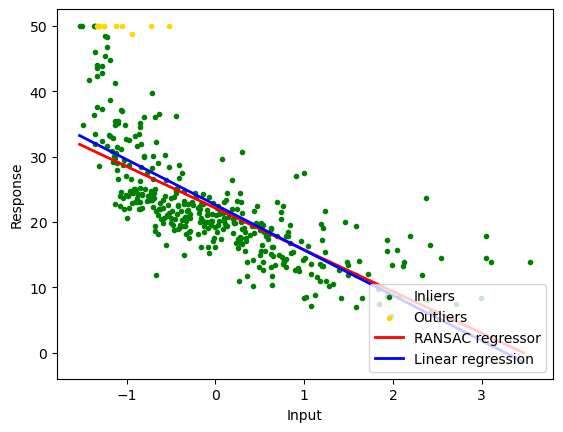

In [38]:
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y_ransac = ransac.predict(line_X)
line_y_lr = lr.predict(line_X)

plt.scatter(X_train[ransac.inlier_mask_], y_train[ransac.inlier_mask_], color='green', marker='.',
            label='Inliers')
plt.scatter(X_train[~ransac.inlier_mask_], y_train[~ransac.inlier_mask_], color='gold', marker='.',
            label='Outliers')
plt.plot(line_X, line_y_ransac, color='red', linewidth=2, label='RANSAC regressor')
plt.plot(line_X, line_y_lr, color='blue', linewidth=2, label='Linear regression')

 
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

In [37]:
r2_ransac = r2_score(y_test, ransac.predict(X_test))
print("Ransac regression result: {}".format(r2_ransac))
print("Linear regression result: {}".format(r2_lr))

Ransac regression result: 0.592537679583333
Linear regression result: 0.5829227809731
